In [61]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import resample

# First Preprocessing

In [74]:
dat = pd.read_csv("dataset.csv")
dat

C:\Users\ellie\AppData\Local\Temp\ipykernel_2188\276229053.py:1: DtypeWarning: Columns (3,4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  dat = pd.read_csv("dataset.csv")


,id,spkid,full_name,pdes,name,prefix,neo,pha,H,diameter,...,sigma_i,sigma_om,sigma_w,sigma_ma,sigma_ad,sigma_n,sigma_tp,sigma_per,class,rms
0,a0000001,2000001,1 Ceres,1,Ceres,NaN,N,N,3.400,939.400,...,4.608900e-09,6.168800e-08,6.624800e-08,7.820700e-09,1.111300e-11,1.196500e-12,3.782900e-08,9.415900e-09,MBA,0.43301
1,a0000002,2000002,2 Pallas,2,Pallas,NaN,N,N,4.200,545.000,...,3.469400e-06,6.272400e-06,9.128200e-06,8.859100e-06,4.961300e-09,4.653600e-10,4.078700e-05,3.680700e-06,MBA,0.35936
2,a0000003,2000003,3 Juno,3,Juno,NaN,N,N,5.330,246.596,...,3.223100e-06,1.664600e-05,1.772100e-05,8.110400e-06,4.363900e-09,4.413400e-10,3.528800e-05,3.107200e-06,MBA,0.33848
3,a0000004,2000004,4 Vesta,4,Vesta,NaN,N,N,3.000,525.400,...,2.170600e-07,3.880800e-07,1.789300e-07,1.206800e-06,1.648600e-09,2.612500e-10,4.103700e-06,1.274900e-06,MBA,0.39980
4,a0000005,2000005,5 Astraea,5,Astraea,NaN,N,N,6.900,106.699,...,2.740800e-06,2.894900e-05,2.984200e-05,8.303800e-06,4.729000e-09,5.522700e-10,3.474300e-05,3.490500e-06,MBA,0.52191
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
958519,bPLS6013,3246801,(6013 P-L),6013 P-L,NaN,NaN,N,N,17.135,NaN,...,6.969000e+00,7.433000e+00,4.631100e+01,2.738300e+01,1.041200e+00,1.652100e-01,1.309700e+02,7.264900e+02,MBA,0.23839
958520,bPLS6331,3246834,(6331 P-L),6331 P-L,NaN,NaN,N,N,18.500,NaN,...,1.563500e-05,5.598600e-05,2.380400e-04,1.298200e-04,2.418900e-08,3.346100e-09,4.690200e-04,1.578500e-05,MBA,0.53633
958521,bPLS6344,3013075,(6344 P-L),6344 P-L,NaN,NaN,Y,Y,20.400,NaN,...,1.853300e-05,5.691700e-05,8.969200e-05,5.272600e-05,1.650100e-07,1.101600e-08,2.830600e-04,9.127500e-05,APO,0.51556
958522,bT2S2060,3246457,(2060 T-2),2060 T-2,NaN,NaN,N,N,18.071,NaN,...,5.448800e-01,4.391600e+00,1.898800e+01,1.083800e+01,7.171600e-01,1.016700e-01,3.898400e+01,5.035500e+02,MBA,0.25641


In [43]:
print("\nDataset Information:")
print(dat.info())


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 958524 entries, 0 to 958523
Data columns (total 45 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   id              958524 non-null  object 
 1   spkid           958524 non-null  int64  
 2   full_name       958524 non-null  object 
 3   pdes            958524 non-null  object 
 4   name            22064 non-null   object 
 5   prefix          18 non-null      object 
 6   neo             958520 non-null  object 
 7   pha             938603 non-null  object 
 8   H               952261 non-null  float64
 9   diameter        136209 non-null  float64
 10  albedo          135103 non-null  float64
 11  diameter_sigma  136081 non-null  float64
 12  orbit_id        958524 non-null  object 
 13  epoch           958524 non-null  float64
 14  epoch_mjd       958524 non-null  int64  
 15  epoch_cal       958524 non-null  float64
 16  equinox         958524 non-null  o

In [44]:
print("\nMissing Values:")
print(dat.isnull().sum())


Missing Values:
id                     0
spkid                  0
full_name              0
pdes                   0
name              936460
prefix            958506
neo                    4
pha                19921
H                   6263
diameter          822315
albedo            823421
diameter_sigma    822443
orbit_id               0
epoch                  0
epoch_mjd              0
epoch_cal              0
equinox                0
e                      0
a                      0
q                      0
i                      0
om                     0
w                      0
ma                     1
ad                     4
n                      0
tp                     0
tp_cal                 0
per                    4
per_y                  1
moid               19921
moid_ld              127
sigma_e            19922
sigma_a            19922
sigma_q            19922
sigma_i            19922
sigma_om           19922
sigma_w            19922
sigma_ma           19922
sigma_ad

In [75]:
# remove identifiers
dat = dat.drop(['id','spkid','full_name','pdes','name','prefix','equinox'], axis = 1)

In [76]:
dat.loc[:,'neo'] = dat.loc[:,'neo'].replace({'Y': 1,'N': 0})
dat.loc[:,'pha'] = dat.loc[:,'pha'].replace({'Y': 1,'N': 0})
dat.loc[:,'class'] = dat.loc[:,'class'].replace({"AMO":int(1), "APO":int(2), "AST":int(3), "ATE":int(4), 
                                                 "CEN":int(5), "HYA":int(6), "IEO":int(7), "IMB":int(8),
                                                 "MBA":int(9), "MCA":int(10), "OMB":int(11), "TJN":int(12),
                                                 "TNO":int(13)}).astype('int64')

C:\Users\ellie\AppData\Local\Temp\ipykernel_2188\3807829354.py:1: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dat.loc[:,'neo'] = dat.loc[:,'neo'].replace({'Y': 1,'N': 0})
C:\Users\ellie\AppData\Local\Temp\ipykernel_2188\3807829354.py:2: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dat.loc[:,'pha'] = dat.loc[:,'pha'].replace({'Y': 1,'N': 0})
C:\Users\ellie\AppData\Local\Temp\ipykernel_2188\3807829354.py:3: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a 

In [70]:
print(dat.head())

   neo  pha     H  diameter  albedo  diameter_sigma orbit_id      epoch  \
0  0.0  0.0  3.40   939.400  0.0900           0.200   JPL 47  2458600.5   
1  0.0  0.0  4.20   545.000  0.1010          18.000   JPL 37  2459000.5   
2  0.0  0.0  5.33   246.596  0.2140          10.594  JPL 112  2459000.5   
3  0.0  0.0  3.00   525.400  0.4228           0.200   JPL 35  2458600.5   
4  0.0  0.0  6.90   106.699  0.2740           3.140  JPL 114  2459000.5   

   epoch_mjd   epoch_cal  ...       sigma_i      sigma_om       sigma_w  \
0      58600  20190427.0  ...  4.608900e-09  6.168800e-08  6.624800e-08   
1      59000  20200531.0  ...  3.469400e-06  6.272400e-06  9.128200e-06   
2      59000  20200531.0  ...  3.223100e-06  1.664600e-05  1.772100e-05   
3      58600  20190427.0  ...  2.170600e-07  3.880800e-07  1.789300e-07   
4      59000  20200531.0  ...  2.740800e-06  2.894900e-05  2.984200e-05   

       sigma_ma      sigma_ad       sigma_n      sigma_tp     sigma_per  \
0  7.820700e-09  1.1113

# EDA

C:\Users\ellie\AppData\Local\Temp\ipykernel_2188\4287029827.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(dat.corr(),vmax=1.0, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True, fmt=".1f")


<Axes: >

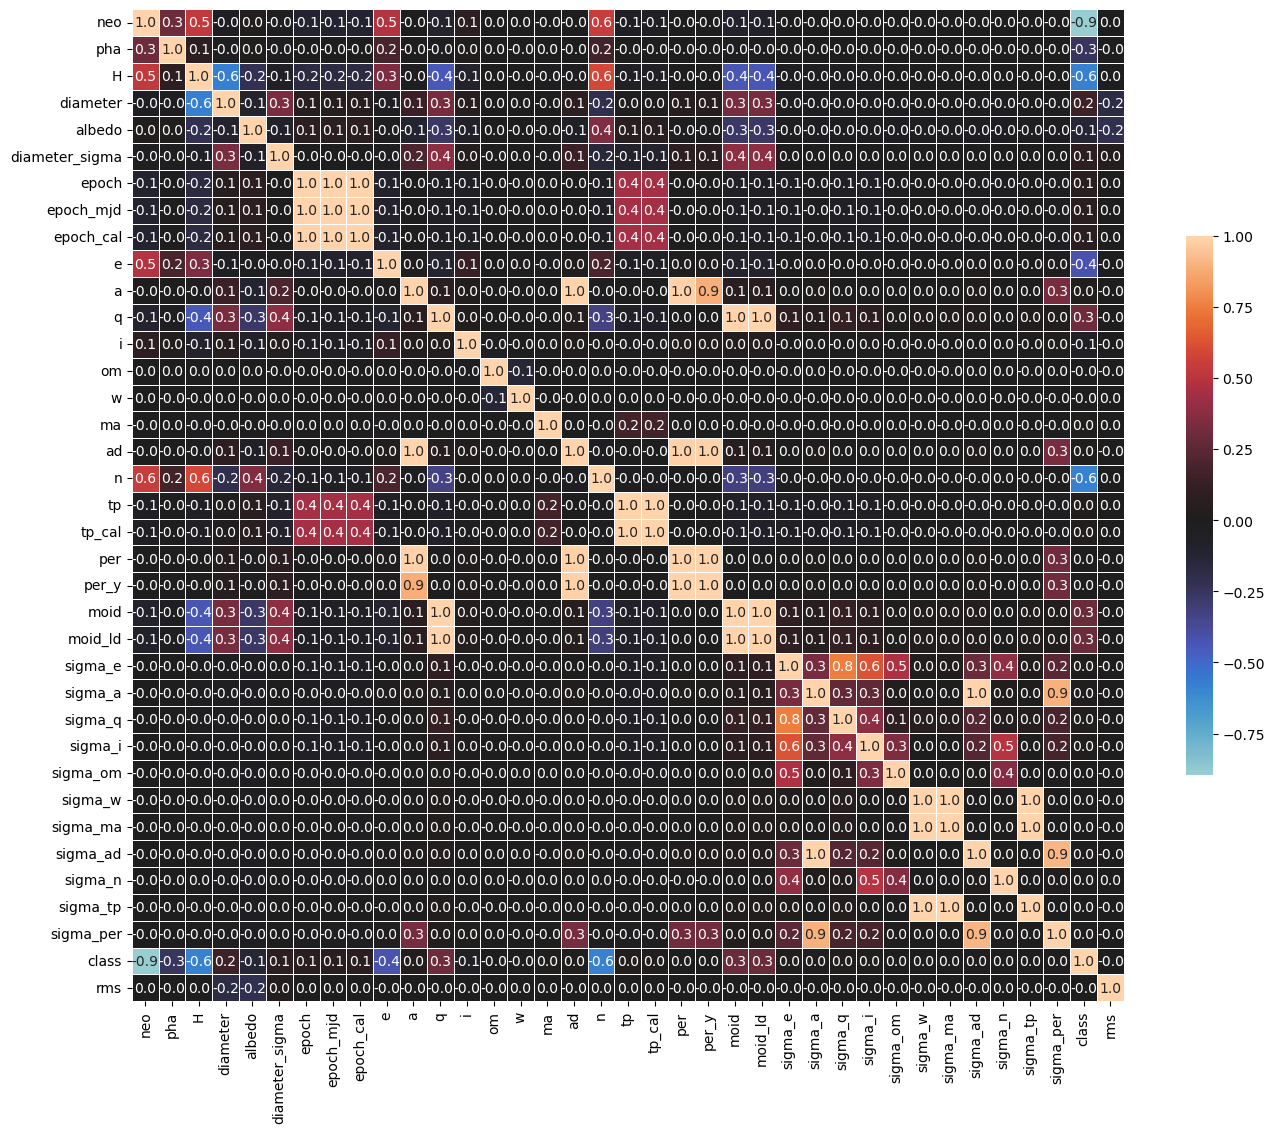

In [58]:
f, ax = plt.subplots(figsize = (16, 14))      

sns.heatmap(dat.corr(),vmax=1.0, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True, fmt=".1f")

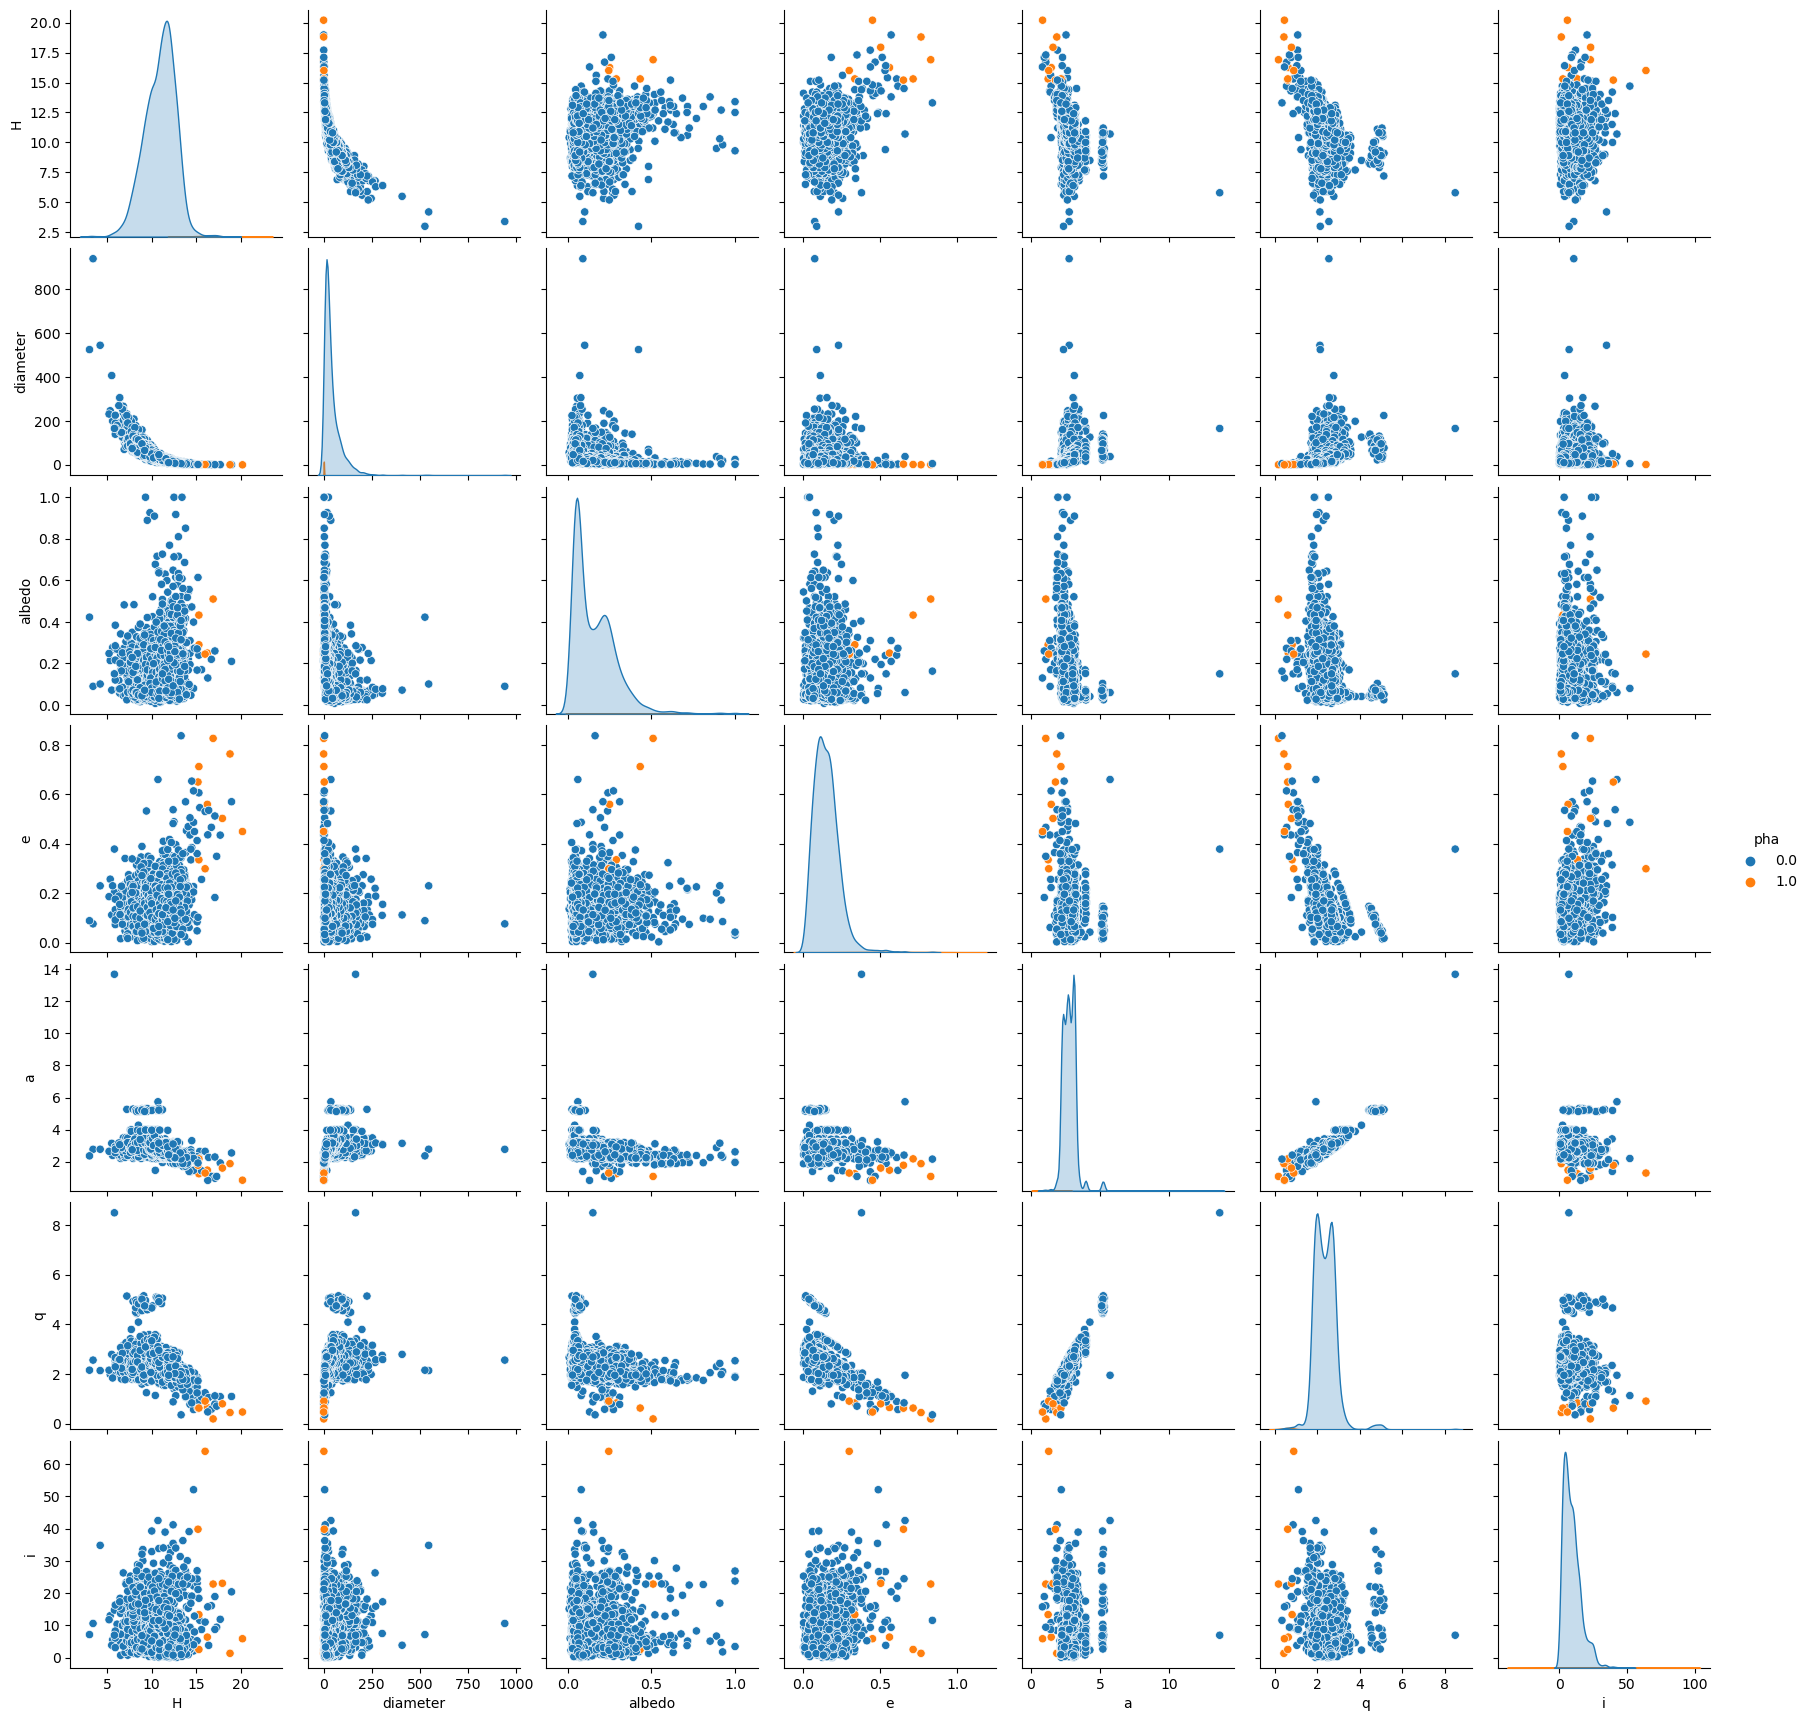

In [60]:
pairp = dat
pairp['pha'] = pairp['pha'].astype('category')

sns.pairplot(data = pairp.loc[0:2500, ['pha','H','diameter','albedo','e','a','q','i']], hue=('pha'))

# Second Preprocessing

In [77]:
pha_count = dat['pha'].value_counts()
print(pha_count)

0.0    936537
1.0      2066
Name: pha, dtype: int64


In [80]:
dat = dat.drop(['orbit_id'], axis = 1)
dat = dat.dropna()

In [81]:
# drop 50% of the 0s
dat = dat.drop(dat[dat['pha'] == 0.0].sample(frac = 0.5).index)

phay = dat[dat['pha'] == 1.0]
phan = dat[dat['pha'] == 0.0]

# oversample the 'Y' class
sampley = resample(phay, replace = True, n_samples = len(phan), random_state = 8)

dat = pd.concat([sampley, phan])
dat = dat.sample(frac = 1, random_state = 8).reset_index(drop = True)

print(dat['pha'].value_counts())

0.0    65481
1.0    65481
Name: pha, dtype: int64


In [82]:
dat.to_csv('processed.csv')